In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Solar abundances

## Map solar system elements

In [4]:
df = pd.read_csv("~/Desktop/data/space_odyssey/lodders2008.csv")
df.head()

,Z,name,present,gya4.56
0,1,H,12.000,12.000
1,2,He,10.925,10.986
2,3,Li,3.280,3.330
3,4,Be,1.320,1.370
4,5,Be,2.810,2.860


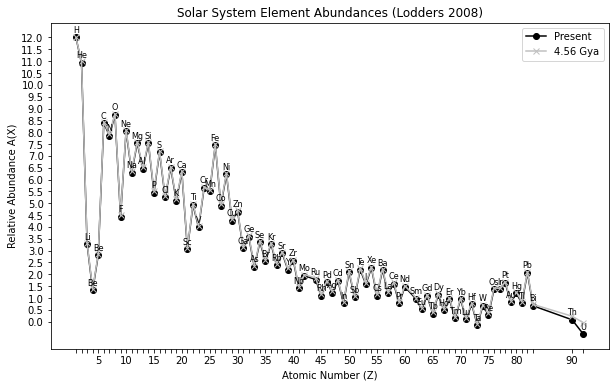

In [5]:
plt.figure(figsize=(10, 6))

plt.plot(df['Z'], df['present'], label='Present', marker='o', color='black')
plt.plot(df['Z'], df['gya4.56'], label='4.56 Gya', marker='x', color='silver')

# Adding element 'name' labels
for i, row in df.iterrows():
    plt.annotate(row['name'], (row['Z'], row['present']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Grid / ticks (hide for figures)
plt.xticks(ticks=df['Z'], labels=[str(int(z)) if z % 5 == 0 else '' for z in df['Z']])
plt.yticks(ticks=np.arange(0, df['present'].max() + 0.5, 0.5))

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Relative Abundance A(X)')
plt.title('Solar System Element Abundances (Lodders 2008)')

plt.legend()
plt.grid(False)
plt.show()


## Map dataset cofactors

In [6]:
cf = pd.read_csv("~/Desktop/data/space_odyssey/cofactors.csv")
cf.head()

,CofactorFinal,count1,ratio1,count2,ratio2
0,Mg,305,0.248777,671,0.195228
1,Fe,214,0.174551,602,0.175153
2,Zn,157,0.128059,425,0.123654
3,S,127,0.103589,322,0.093686
4,Mn,93,0.075856,252,0.073320


In [7]:
# Remove all cofactors which are not elemental 
elements = df["name"].to_list()
filter = cf["CofactorFinal"].isin(elements)
cf_filt = cf[filter]

# Add a mean concentration column
cf_new = cf_filt.copy()
cf_new["mean"] = cf_new[["ratio1", "ratio2"]].mean(axis=1)
cf_new.head()

,CofactorFinal,count1,ratio1,count2,ratio2,mean
0,Mg,305,0.248777,671,0.195228,0.222002
1,Fe,214,0.174551,602,0.175153,0.174852
2,Zn,157,0.128059,425,0.123654,0.125857
3,S,127,0.103589,322,0.093686,0.098638
4,Mn,93,0.075856,252,0.073320,0.074588


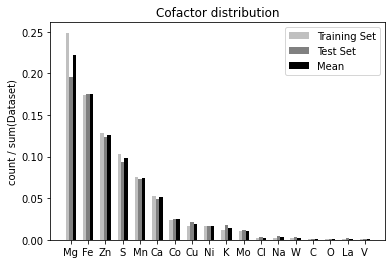

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

data = cf_new
N = 18
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='grey') 

zvals = data['mean']
bar3 = plt.bar(ind+width*2, zvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"]) 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution") 
plt.legend((bar1, bar2, bar3), ('Training Set', 'Test Set', 'Mean'))

plt.show() 

## Combine

In [9]:
cf_mean = cf_new[["CofactorFinal", "ratio1", "ratio2", "mean"]]
cf_mean = cf_mean.rename(columns={"CofactorFinal": "name"})
merged = pd.merge(left=df, right=cf_mean, on="name", how="left")
merged.head()

,Z,name,present,gya4.56,ratio1,ratio2,mean
0,1,H,12.000,12.000,NaN,NaN,NaN
1,2,He,10.925,10.986,NaN,NaN,NaN
2,3,Li,3.280,3.330,NaN,NaN,NaN
3,4,Be,1.320,1.370,NaN,NaN,NaN
4,5,Be,2.810,2.860,NaN,NaN,NaN


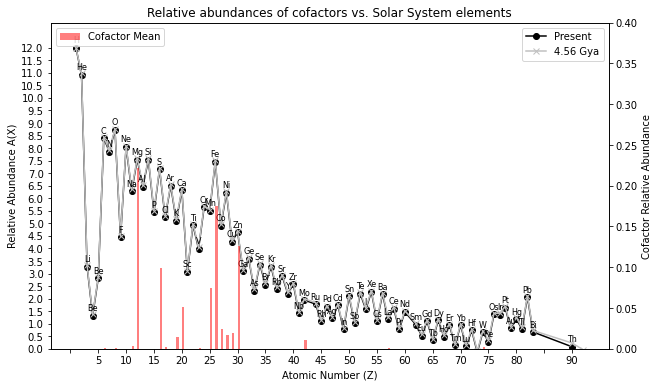

In [10]:
plt.figure(figsize=(10, 6))

# Same plot as above for elements
plt.plot(merged['Z'], merged['present'], label='Present', marker='o', color='black')
plt.plot(merged['Z'], merged['gya4.56'], label='4.56 Gya', marker='x', color='silver')
for i, row in merged.iterrows():
    plt.annotate(row['name'], (row['Z'], row['present']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
plt.xticks(ticks=merged['Z'], labels=[str(int(z)) if z % 5 == 0 else '' for z in merged['Z']])
plt.yticks(ticks=np.arange(0, merged['present'].max() + 0.5, 0.5))
plt.xlabel('Atomic Number (Z)')
plt.ylabel('Relative Abundance A(X)')
plt.title('Relative abundances of cofactors vs. Solar System elements')
plt.legend(loc='upper right')

plt.ylim(0, 13)

# Overlay cofactor abundances
ax2 = plt.gca().twinx()
ax2.bar(merged['Z'] + 0.2, merged['mean'], alpha=0.5, color='red', width=0.4, label='Cofactor Mean')
ax2.set_ylabel('Cofactor Relative Abundance')
ax2.set_xticks(range(0, int(merged['Z'].max()) + 1, 5))
ax2.legend(loc='upper left')

ax2.set_ylim(0, 0.4)

plt.show()

In [11]:
# Create same graph but only with overlapping elements

overlap = merged.copy()
overlap["mean"] = overlap["mean"].astype(str)
nan = overlap["mean"].str.contains("nan")
overlap = overlap[~nan]
overlap = overlap.reset_index().drop("index", axis=1)
overlap["mean"] = overlap["mean"].astype("f8")

overlap.head()

,Z,name,present,gya4.56,ratio1,ratio2,mean
0,6,C,8.39,8.44,0.000816,0.000582,0.000699
1,8,O,8.73,8.78,0.000816,0.000873,0.000844
2,11,Na,6.29,6.35,0.001631,0.004655,0.003143
3,12,Mg,7.54,7.60,0.248777,0.195228,0.222002
4,16,S,7.16,7.21,0.103589,0.093686,0.098638


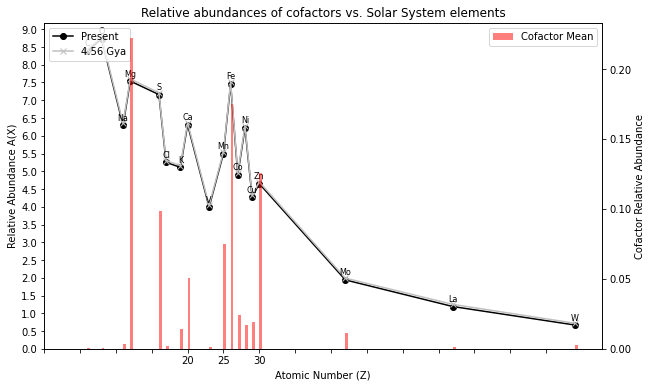

In [12]:
plt.figure(figsize=(10, 6))

# Same plot as above for elements
plt.plot(overlap['Z'], overlap['present'], label='Present', marker='o', color='black')
plt.plot(overlap['Z'], overlap['gya4.56'], label='4.56 Gya', marker='x', color='silver')
for i, row in overlap.iterrows():
    plt.annotate(row['name'], (row['Z'], row['present']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
plt.xticks(ticks=overlap['Z'], labels=[str(int(z)) if z % 5 == 0 else '' for z in overlap['Z']])
plt.yticks(ticks=np.arange(0, overlap['present'].max() + 0.5, 0.5))
plt.xlabel('Atomic Number (Z)')
plt.ylabel('Relative Abundance A(X)')
plt.title('Relative abundances of cofactors vs. Solar System elements')
plt.legend(loc='upper left')
#plt.grid(False)

# Overlay cofactor abundances
ax2 = plt.gca().twinx()
ax2.bar(overlap['Z'] + 0.2, overlap['mean'], alpha=0.5, color='red', width=0.4, label='Cofactor Mean')
ax2.set_ylabel('Cofactor Relative Abundance')
ax2.set_xticks(range(0, int(overlap['Z'].max()) + 1, 5))
ax2.legend(loc='upper right')

plt.show()

In [13]:
# Now to focus on metals and their types:

metal_types = {
    'Alkali':  ["H","Li","Na","K","Rb","Cs","Fr"],
    'Alkaline': ["Be","Mg","Ca","Sr","Ba","Ra"],
    'Transition': ["Sc","Ti","V","Cr","Mn","Fe","Co","Ni","Cu","Zn","Y","Zr","Nb","Mo""Tc","Ru","Rh","Pd","Ag","Cd","Hf","Ta","W","Re","Os","Ir","Pt","Au","Hg","Mo"],
    'Post-transition': ["Al","Ga","In","Sn","Pb","Tl","Bi","Po","Fl"] ,
    'Lanthanoid': ["La","Ce","Pr","Nd","Pm","Sm","Eu","Gd","Tb","Dy","Ho","Er","Tm","Yb","Lu"],
    'Actinoid': ["Ac","Th","Pa","U","Np","Pu","Am","Cm","Bk","Cf","Es","Fm","Md","No","Lr","Rf"]
}
    #'reactive_non-metal': ["C","N","O","F","P","S","Cl","Se","Br","I"]

# Create a mapping to label elements
element_to_type = {elem: metal_type for metal_type, elems in metal_types.items() for elem in elems}
overlap['metal_type'] = overlap['name'].map(element_to_type)

# Take only metals
overlap = overlap.dropna()

# Element list
element_list = overlap["name"].to_list()
print(element_list)

overlap.head()

['Na', 'Mg', 'K', 'Ca', 'V', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Mo', 'La', 'W']


,Z,name,present,gya4.56,ratio1,ratio2,mean,metal_type
2,11,Na,6.29,6.35,0.001631,0.004655,0.003143,Alkali
3,12,Mg,7.54,7.60,0.248777,0.195228,0.222002,Alkaline
6,19,K,5.11,5.16,0.011419,0.017457,0.014438,Alkali
7,20,Ca,6.31,6.37,0.052202,0.049462,0.050832,Alkaline
8,23,V,3.99,4.04,0.000816,0.001455,0.001135,Transition


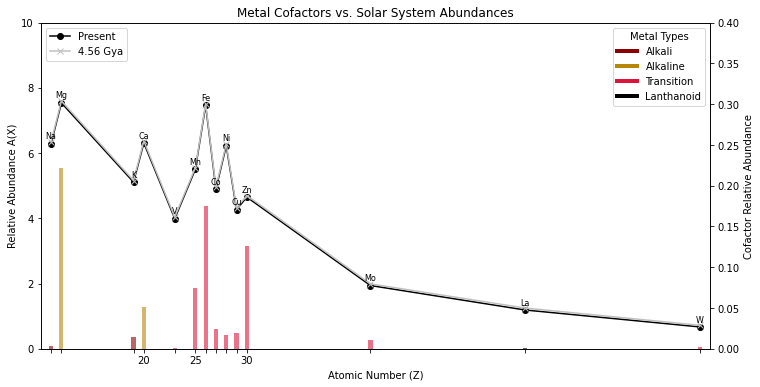

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(overlap['Z'], overlap['present'], label='Present', marker='o', color='black')
plt.plot(overlap['Z'], overlap['gya4.56'], label='4.56 Gya', marker='x', color='silver')

# Annotate each point with color-coded labels
metal_colors = {
    'Alkali': 'darkred',
    'Alkaline': 'darkgoldenrod',
    'Transition': 'crimson',
    #'Post-transition': 'purple',
    'Lanthanoid': 'black',
    #'reactive_non-metal': 'green'
}

for i, row in overlap.iterrows():
    plt.annotate(
        row['name'],
        (row['Z'], row['present']),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center',
        fontsize=8,
        #color=metal_colors.get(row['metal_type'], 'black')  # Default to black if type not found
    )

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Relative Abundance A(X)')
plt.xlim(10, 75)
plt.ylim(0, 10)
plt.title('Metal Cofactors vs. Solar System Abundances')
plt.legend(loc='upper left')

# Cofactor bars
ax2 = plt.gca().twinx()
bars = ax2.bar(overlap['Z'], overlap['mean'], alpha=0.6, width=0.4, color=[metal_colors.get(mt, 'gray') for mt in overlap['metal_type']])
ax2.set_ylabel('Cofactor Relative Abundance')
ax2.set_ylim(0,0.4)
ax2.set_xticks(overlap['Z'])
ax2.set_xticklabels([str(int(z)) if z % 5 == 0 else '' for z in overlap['Z']])

# Color legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in metal_colors.values()]
labels = metal_colors.keys()
ax2.legend(handles, labels, loc='upper right', title='Metal Types') #handles, labels, loc='upper right', title='Metal Types'

plt.show()

In [15]:
# Investigate element characteristics:
element_values = {
    'name': element_list,
    'oxidation_states': [2, 2, 2, 2, 6, 10, 8, 6, 5, 4, 2, 8, 2, 8],
    'valence_electrons': [1, 2, 1, 2, 5, 7, 8, 9, 10, 11, 12, 6, 4, 6],
    'electronegativity': [0.93, 1.31, 0.82, 1, 1.63, 1.55, 1.83, 1.88, 1.91, 1.9, 1.65, 2.16, 1.1, 2.36] ,
    'electron_affinity': [52.8, 0, 48.4, 2.37, 50.6, 0, 15.7, 63.7, 112, 118.4, 0, 71.9, 48, 78.6], #kJ/mol
    'conductivity': [140, 160, 100, 200, 31, 7.8, 80, 100, 91, 400, 120, 139, 13, 170] # W/mK
}

ev = pd.DataFrame(element_values)
test_df = pd.merge(left=overlap, right=ev, on="name", how="left")

test_df["test1"] = test_df["mean"]*test_df["oxidation_states"]
test_df["test2"] = test_df["mean"]*test_df["valence_electrons"]
test_df["test3"] = test_df["mean"]*test_df["electronegativity"]
test_df["test4"] = test_df["mean"]*test_df["electron_affinity"]

test_df

,Z,name,present,gya4.56,ratio1,ratio2,mean,metal_type,oxidation_states,valence_electrons,electronegativity,electron_affinity,conductivity,test1,test2,test3,test4
0,11,Na,6.29,6.35,0.001631,0.004655,0.003143,Alkali,2,1,0.93,52.80,140.0,0.006287,0.003143,0.002923,0.165965
1,12,Mg,7.54,7.60,0.248777,0.195228,0.222002,Alkaline,2,2,1.31,0.00,160.0,0.444005,0.444005,0.290823,0.000000
2,19,K,5.11,5.16,0.011419,0.017457,0.014438,Alkali,2,1,0.82,48.40,100.0,0.028876,0.014438,0.011839,0.698807
3,20,Ca,6.31,6.37,0.052202,0.049462,0.050832,Alkaline,2,2,1.00,2.37,200.0,0.101664,0.101664,0.050832,0.120472
4,23,V,3.99,4.04,0.000816,0.001455,0.001135,Transition,6,5,1.63,50.60,31.0,0.006811,0.005676,0.001850,0.057442
5,25,Mn,5.50,5.55,0.075856,0.073320,0.074588,Transition,10,7,1.55,0.00,7.8,0.745881,0.522117,0.115612,0.000000
6,26,Fe,7.46,7.51,0.174551,0.175153,0.174852,Transition,8,8,1.83,15.70,80.0,1.398817,1.398817,0.319979,2.745177
7,27,Co,4.90,4.96,0.023654,0.025313,0.024483,Transition,6,9,1.88,63.70,100.0,0.146901,0.220351,0.046029,1.559597
8,28,Ni,6.22,6.28,0.016313,0.017166,0.016740,Transition,5,10,1.91,112.00,91.0,0.083698,0.167397,0.031973,1.874843
9,29,Cu,4.27,4.32,0.017129,0.021530,0.019330,Transition,4,11,1.90,118.40,400.0,0.077319,0.212626,0.036726,2.288629


Note: removed plots as they had no results of interest, keeping dataframe for future use

# Comparisons

In [17]:
master = pd.read_csv("~/Desktop/data/space_odyssey/solar_object_comparison.csv")

# Crust and ocean
master["log_crust"] = np.log10(master["crust_kgkg"])
master["log_sea"] = np.log10(master["seawater_kgL"])
# Note: log10(0) = -inf, will not be graphed resulting in breaks seen. Dropping values leads to graph disconnect.

# Solar and chondrite abundances both relative to Si, but on different scales (Solar 1 million x greater)
master["chondrite_Si-1"] = master["chondrite_Si-10_6"].div(10e6)
master["log_solar"] = np.log10(master["solar_Si-1"])
master["log_chondrite"] = np.log10(master["chondrite_Si-1"])

master.head()

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,element,Z,name,crust_kgkg,seawater_kgL,solar_Si-1,chondrite_Si-10_6,log_crust,log_sea,chondrite_Si-1,log_solar,log_chondrite
0,01 H hydrogen,1,H,1.400000e-03,1.080000e-01,2.800000e+04,5130000.000,-2.853872,-0.966576,5.130000e-01,4.447158,-0.289883
1,02 He helium,2,He,8.000000e-09,7.000000e-12,2.700000e+03,0.601,-8.096910,-11.154902,6.010000e-08,3.431364,-7.221126
2,03 Li lithium,3,Li,2.000000e-05,1.800000e-07,4.000000e-07,55.600,-4.698970,-6.744727,5.560000e-06,-6.397940,-5.254925
3,04 Be beryllium,4,Be,2.800000e-06,5.600000e-12,4.000000e-07,0.612,-5.552842,-11.251812,6.120000e-08,-6.397940,-7.213249
4,05 B boron,5,Be,1.000000e-05,4.440000e-06,1.100000e-05,18.800,-5.000000,-5.352617,1.880000e-06,-4.958607,-5.725842


## Crust vs. Seawater

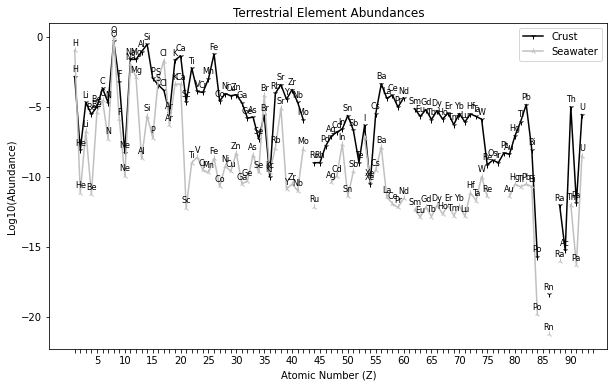

In [18]:
df = master
plt.figure(figsize=(10, 6))

plt.plot(df['Z'], df['log_crust'], label='Crust', marker='1', color='black')
plt.plot(df['Z'], df['log_sea'], label='Seawater', marker='2', color='silver')

# Adding element 'name' labels
for i, row in df.iterrows():
    plt.annotate(row['name'], (row['Z'], row['log_sea']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    plt.annotate(row['name'], (row['Z'], row['log_crust']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    
plt.xticks(ticks=df['Z'], labels=[str(int(z)) if z % 5 == 0 else '' for z in df['Z']])

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Log10(Abundance)')
plt.title('Terrestrial Element Abundances')

plt.legend()
plt.grid(False)
plt.show()

## Solar vs. CI Chondrite

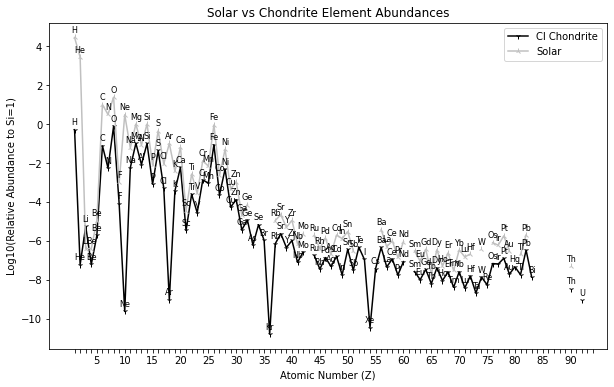

In [19]:
df = master
plt.figure(figsize=(10, 6))

plt.plot(df['Z'], df['log_chondrite'], label='CI Chondrite', marker='1', color='black')
plt.plot(df['Z'], df['log_solar'], label='Solar', marker='2', color='silver')

# Adding element 'name' labels
for i, row in df.iterrows():
    plt.annotate(row['name'], (row['Z'], row['log_solar']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    plt.annotate(row['name'], (row['Z'], row['log_chondrite']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.xticks(ticks=df['Z'], labels=[str(int(z)) if z % 5 == 0 else '' for z in df['Z']])

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Log10(Relative Abundance to Si=1)')
plt.title('Solar vs Chondrite Element Abundances')

plt.legend()
plt.grid(False)
plt.show()

## Combine with cofactors

In [20]:
# Copy cofactors dataframe from above
print(len(cf_new), "elemental cofactors")
cf_df = cf_new.copy()

# Limit master dataframe to overlap w/ elemental cofactors
maol = master.copy()
cofactors = cf_new["CofactorFinal"].to_list()
shared = maol["name"].isin(cofactors)
maol = maol[shared]

# Merge with cofactor values 
cf_df = cf_df.rename(columns={"CofactorFinal": "name"})
mame = pd.merge(left=maol, right=cf_df, on="name", how="left")

overlap = mame.copy()

# Reactive elements mapping:
metal_types = {
    'Alkali':  ["H","Li","Na","K","Rb","Cs","Fr"],
    'Alkaline': ["Be","Mg","Ca","Sr","Ba","Ra"],
    'Transition': ["Sc","Ti","V","Cr","Mn","Fe","Co","Ni","Cu","Zn","Y","Zr","Nb","Mo""Tc","Ru","Rh","Pd","Ag","Cd","Hf","Ta","W","Re","Os","Ir","Pt","Au","Hg","Mo"],
    'Post-transition': ["Al","Ga","In","Sn","Pb","Tl","Bi","Po","Fl"] ,
    'Lanthanoid': ["La","Ce","Pr","Nd","Pm","Sm","Eu","Gd","Tb","Dy","Ho","Er","Tm","Yb","Lu"],
    'Actinoid': ["Ac","Th","Pa","U","Np","Pu","Am","Cm","Bk","Cf","Es","Fm","Md","No","Lr","Rf"],
    'Reactive non-metal': ["C","N","O","F","P","S","Cl","Se","Br","I"]
}

# Color-labels for figure annotation:
metal_colors = {
    'Alkali': 'darkred',
    'Alkaline': 'darkgoldenrod',
    'Transition': 'crimson',
    'Post-transition': 'purple',
    'Lanthanoid': 'black',
    'Reactive non-metal': 'green'
}
    
# Create a mapping to label elements
element_to_type = {elem: metal_type for metal_type, elems in metal_types.items() for elem in elems}
overlap['metal_type'] = overlap['name'].map(element_to_type)

# Element list
element_list = overlap["name"].to_list()
print(element_list)

18 elemental cofactors
['C', 'O', 'Na', 'Mg', 'S', 'Cl', 'K', 'Ca', 'V', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Mo', 'La', 'W']


In [21]:
# Added as a test, since here the main y-axis is logarithmic, whereas the bar's y-axis is not
overlap["log_mean"] = np.log10(overlap["mean"])

# Mean abundance of Earth's crust/oceans
overlap["earth_mean"] = overlap[["log_crust", "log_sea"]].mean(axis=1)

# Mean abundance of sun/chondrites
overlap["system_mean"] = overlap[["log_solar", "log_chondrite"]].mean(axis=1)
overlap["et_avg"] = overlap[["earth_mean", "system_mean"]].mean(axis=1)

overlap.head()

,element,Z,name,crust_kgkg,seawater_kgL,solar_Si-1,chondrite_Si-10_6,log_crust,log_sea,chondrite_Si-1,...,count1,ratio1,count2,ratio2,mean,metal_type,log_mean,earth_mean,system_mean,et_avg
0,06 C carbon,6,C,0.00020,0.000028,10.00,760000.0,-3.698970,-4.552842,0.07600,...,1,0.000816,2,0.000582,0.000699,Reactive non-metal,-3.155658,-4.125906,-0.059593,-2.092750
1,08 O oxygen,8,O,0.46100,0.857000,24.00,7630000.0,-0.336299,-0.067019,0.76300,...,1,0.000816,3,0.000873,0.000844,Reactive non-metal,-3.073525,-0.201659,0.631368,0.214854
2,11 Na sodium,11,Na,0.02360,0.010800,0.06,57300.0,-1.627088,-1.966576,0.00573,...,2,0.001631,16,0.004655,0.003143,Alkali,-2.502618,-1.796832,-1.731847,-1.764340
3,12 Mg magnesium,12,Mg,0.02330,0.001290,1.00,1030000.0,-1.632644,-2.889410,0.10300,...,305,0.248777,671,0.195228,0.222002,Alkaline,-0.653642,-2.261027,-0.493581,-1.377304
4,16 S sulfur,16,S,0.00035,0.000905,0.45,438000.0,-3.455932,-3.043351,0.04380,...,127,0.103589,322,0.093686,0.098638,Reactive non-metal,-1.005957,-3.249642,-0.852657,-2.051149


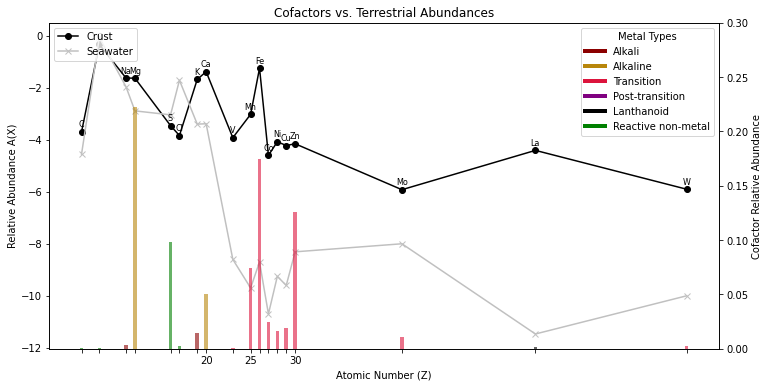

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(overlap['Z'], overlap['log_crust'], label='Crust', marker='o', color='black')
plt.plot(overlap['Z'], overlap['log_sea'], label='Seawater', marker='x', color='silver')

for i, row in overlap.iterrows():
    plt.annotate(
        row['name'],
        (row['Z'], row['log_crust']),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center',
        fontsize=8,
        #color=metal_colors.get(row['metal_type'], 'black')  # Default to black if type not found
    )

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Relative Abundance A(X)')
plt.title('Cofactors vs. Terrestrial Abundances')
plt.legend(loc='upper left')

# Cofactor bars
ax2 = plt.gca().twinx()
bars = ax2.bar(overlap['Z'], overlap['mean'], alpha=0.6, width=0.4, color=[metal_colors.get(mt, 'gray') for mt in overlap['metal_type']])
ax2.set_ylabel('Cofactor Relative Abundance')
ax2.set_ylim(0,0.3)
ax2.set_xticks(overlap['Z'])
ax2.set_xticklabels([str(int(z)) if z % 5 == 0 else '' for z in overlap['Z']])

# Color legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in metal_colors.values()]
labels = metal_colors.keys()
ax2.legend(handles, labels, loc='upper right', title='Metal Types') #handles, labels, loc='upper right', title='Metal Types'

plt.show()

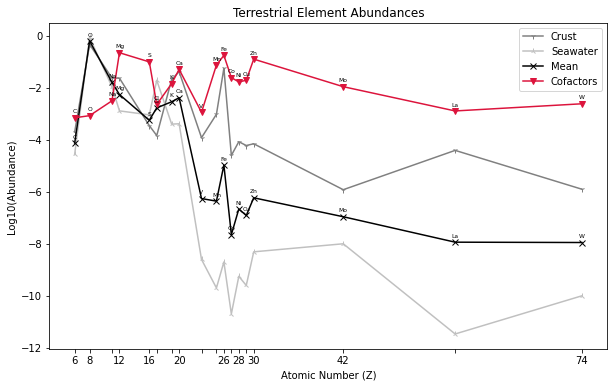

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(overlap['Z'], overlap['log_crust'], label='Crust', marker='1', color='grey')
plt.plot(overlap['Z'], overlap['log_sea'], label='Seawater', marker='2', color='silver')
plt.plot(overlap['Z'], overlap['earth_mean'], label='Mean', marker='x', color='black')
plt.plot(overlap['Z'], overlap['log_mean'], label='Cofactors', marker='v', color='crimson')

# Adding element 'name' labels
for i, row in overlap.iterrows():
    plt.annotate(row['name'], (row['Z'], row['log_mean']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)
    plt.annotate(row['name'], (row['Z'], row['earth_mean']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)
    
plt.xticks(ticks=overlap['Z'], labels=[str(int(z)) if z % 2 == 0 else '' for z in overlap['Z']])

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Log10(Abundance)')
plt.title('Terrestrial Element Abundances')

plt.legend()
plt.grid(False)
plt.show()

# In theory axes should be approximately 1:1...units = kg/kg, kg/L (H2O; ~kg/kg), and normalized n/1 cofactors, all log10

Note: for the cofactor (red) line, overall trends follow the mean, but some are characteristic of seawater vs. crust, can potentially correlate with weathering/mixing

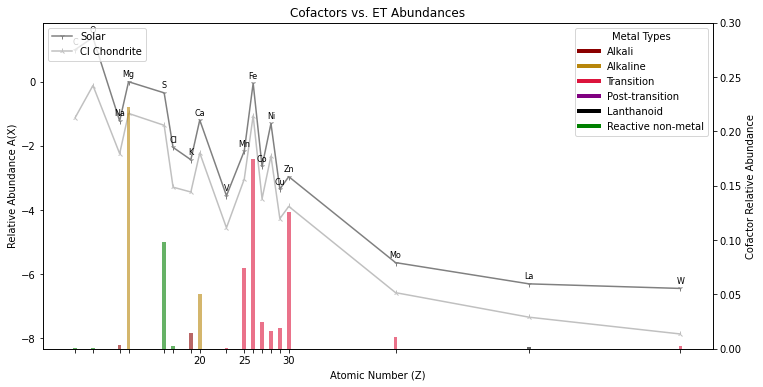

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(overlap['Z'], overlap['log_solar'], label='Solar', marker='1', color='grey')
plt.plot(overlap['Z'], overlap['log_chondrite'], label='CI Chondrite', marker='2', color='silver')

for i, row in overlap.iterrows():
    plt.annotate(
        row['name'],
        (row['Z'], row['log_solar']),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center',
        fontsize=8,
        #color=metal_colors.get(row['metal_type'], 'black')  # Default to black if type not found
    )

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Relative Abundance A(X)')
#plt.xlim(10, 75)
#plt.ylim(0, 10)
plt.title('Cofactors vs. ET Abundances')
plt.legend(loc='upper left')

# Cofactor bars
ax2 = plt.gca().twinx()
bars = ax2.bar(overlap['Z'], overlap['mean'], alpha=0.6, width=0.4, color=[metal_colors.get(mt, 'gray') for mt in overlap['metal_type']])
ax2.set_ylabel('Cofactor Relative Abundance')
ax2.set_ylim(0,0.3)
ax2.set_xticks(overlap['Z'])
ax2.set_xticklabels([str(int(z)) if z % 5 == 0 else '' for z in overlap['Z']])

# Color legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in metal_colors.values()]
labels = metal_colors.keys()
ax2.legend(handles, labels, loc='upper right', title='Metal Types') #handles, labels, loc='upper right', title='Metal Types'

plt.show()

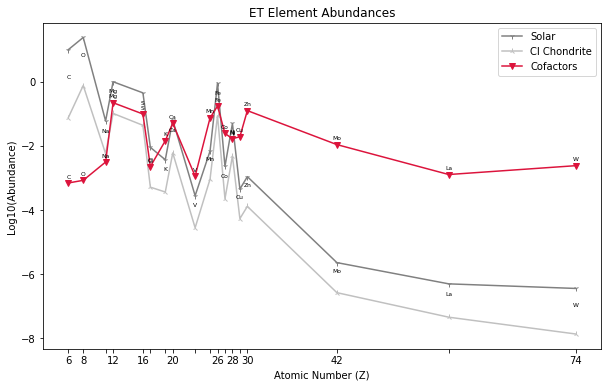

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(overlap['Z'], overlap['log_solar'], label='Solar', marker='1', color='grey')
plt.plot(overlap['Z'], overlap['log_chondrite'], label='CI Chondrite', marker='2', color='silver')
#plt.plot(overlap['Z'], overlap['system_mean'], label='Mean', marker='o', color='black')
plt.plot(overlap['Z'], overlap['log_mean'], label='Cofactors', marker='v', color='crimson')

# Adding element 'name' labels
for i, row in overlap.iterrows():
    plt.annotate(row['name'], (row['Z'], row['log_mean']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)
    plt.annotate(row['name'], (row['Z'], row['system_mean']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)
    
plt.xticks(ticks=overlap['Z'], labels=[str(int(z)) if z % 2 == 0 else '' for z in overlap['Z']])

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Log10(Abundance)')
plt.title('ET Element Abundances')

plt.legend()
plt.grid(False)
plt.show()

# Final Figures

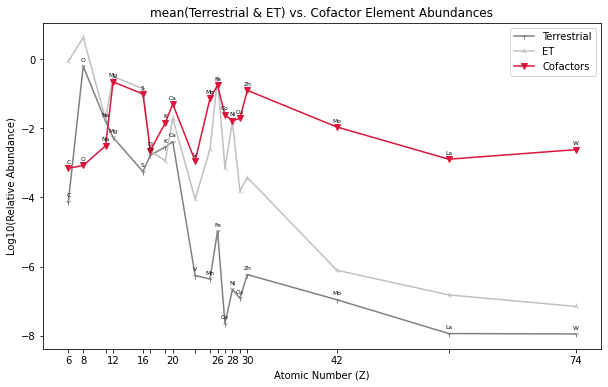

In [26]:
plt.figure(figsize=(10, 6))

plt.plot(overlap['Z'], overlap['earth_mean'], label='Terrestrial', marker='1', color='grey')
plt.plot(overlap['Z'], overlap['system_mean'], label='ET', marker='2', color='silver')
plt.plot(overlap['Z'], overlap['log_mean'], label='Cofactors', marker='v', color='crimson')

for i, row in overlap.iterrows():
    plt.annotate(row['name'], (row['Z'], row['log_mean']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)
    plt.annotate(row['name'], (row['Z'], row['earth_mean']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)
    
plt.xticks(ticks=overlap['Z'], labels=[str(int(z)) if z % 2 == 0 else '' for z in overlap['Z']])

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Log10(Relative Abundance)')
plt.title('mean(Terrestrial & ET) vs. Cofactor Element Abundances')

plt.legend()
plt.grid(False)
plt.show()

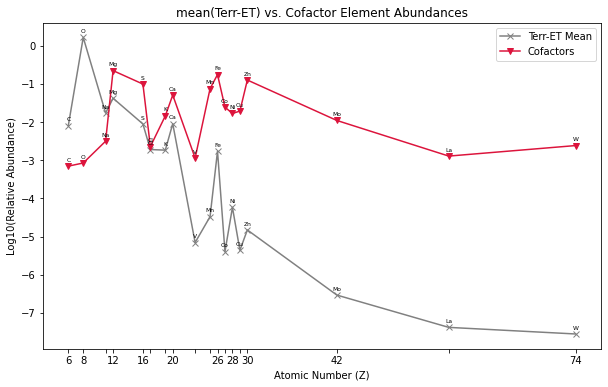

In [27]:
plt.figure(figsize=(10, 6))

plt.plot(overlap['Z'], overlap['et_avg'], label='Terr-ET Mean', marker='x', color='grey')
plt.plot(overlap['Z'], overlap['log_mean'], label='Cofactors', marker='v', color='crimson')

for i, row in overlap.iterrows():
    plt.annotate(row['name'], (row['Z'], row['log_mean']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)
    plt.annotate(row['name'], (row['Z'], row['et_avg']), 
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)
    
plt.xticks(ticks=overlap['Z'], labels=[str(int(z)) if z % 2 == 0 else '' for z in overlap['Z']])

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Log10(Relative Abundance)')
plt.title('mean(Terr-ET) vs. Cofactor Element Abundances')

plt.legend()
plt.grid(False)
plt.show()